In [63]:
import numpy as np
import pandas as pd

In [64]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [65]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...,NaN,NaN,NaN
1249,ham,"I call you later, don't have network. If urgnt...",NaN,NaN,NaN
6545,spam,software for home and office .\r\nlet your ch...,NaN,NaN,NaN
4099,ham,I not at home now lei...,NaN,NaN,NaN
1948,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN


In [66]:
df.shape

(10734, 5)

## 1. Data cleaning

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734 entries, 0 to 10733
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          10734 non-null  object
 1   v2          10734 non-null  object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 419.4+ KB


In [68]:
## drop last 3 columns as we have very limited data
df1 =df.copy()
df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [69]:
df1.sample(5)

,v1,v2
5006,ham,Oh k. . I will come tomorrow
8322,spam,19 and readyyet\r\nclick here to be removed\r\n
3302,ham,"It'll be tough, but I'll do what I have to"
10190,spam,"rolex , cartier , piaget replicas - expensive..."
9566,spam,\r\n9\r\nreceived : from 55 . 240 . 132 . 191...


In [70]:
# renaming columns
df1.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df1.sample(5)

,target,text
593,ham,You still at grand prix?
3559,ham,Lol I know! Hey someone did a great inpersonat...
10283,spam,hot stock mover advisory\r\nyap internationa ...
6977,spam,works wondder\r\ndear sir / madam .\r\nwe are...
5364,spam,Call 09095350301 and send our girls into eroti...


In [71]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df1['target']= encoder.fit_transform(df1['target'])

In [72]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [73]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [74]:
df1.duplicated().sum()

569

In [75]:
## Drop the duplicated values
df1 = df1.drop_duplicates(keep='first')

In [76]:
df1.duplicated().sum()

0

In [77]:
df1.shape

(10165, 2)

## 2. EDA

In [78]:
df1['target'].value_counts()

target
0    8050
1    2115
Name: count, dtype: int64

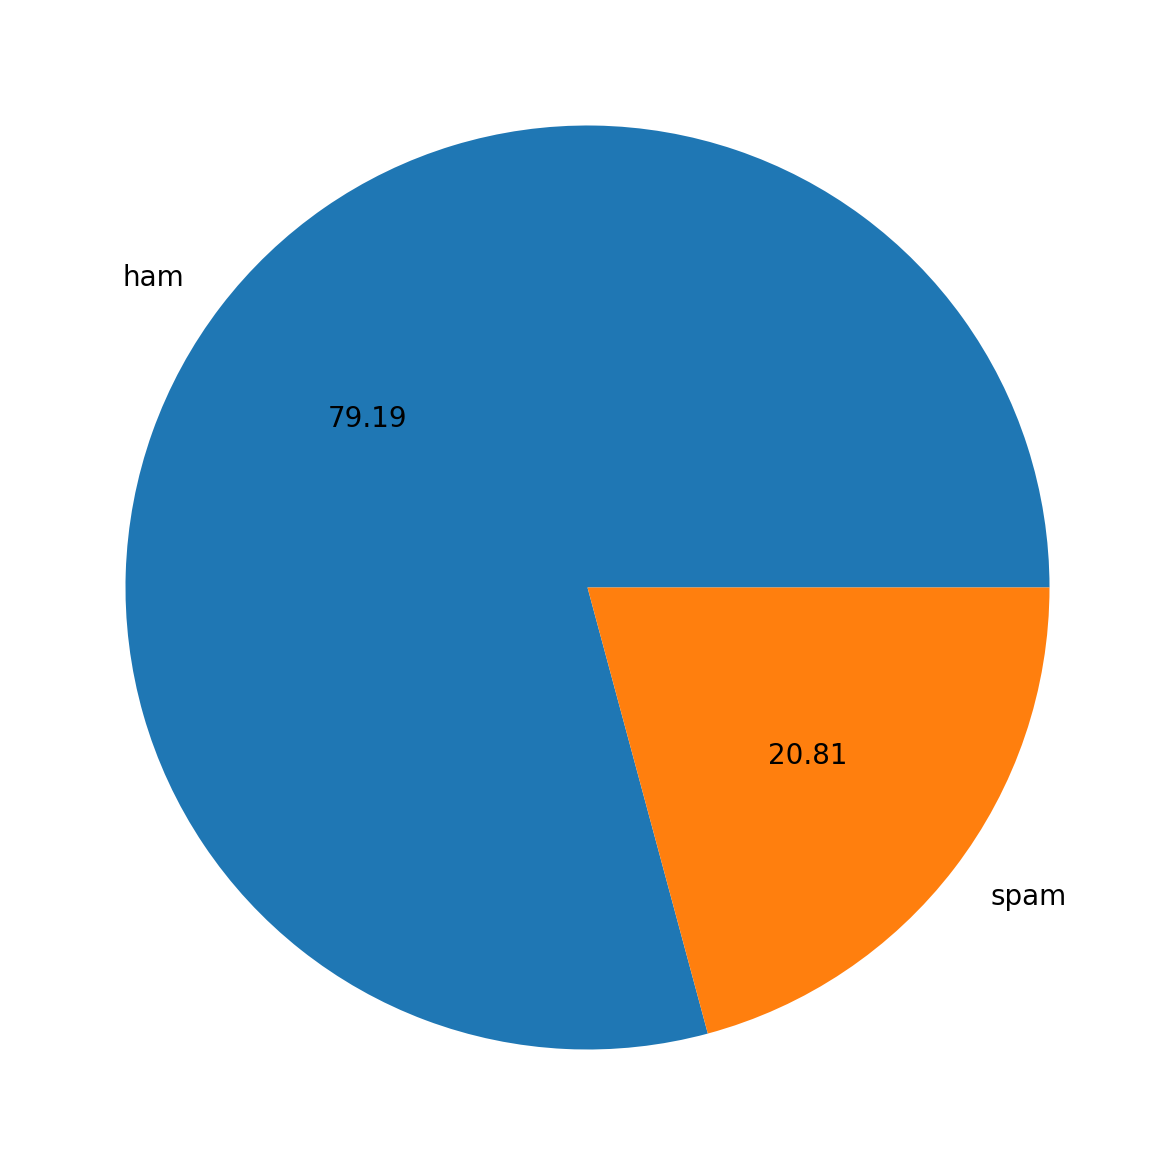

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size':20})
plt.pie(df1['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

***Target label is clearly inbalanced***

Ham values are way more than spam values

In [80]:
import nltk

In [81]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [82]:
## Characters in each sms
df1['num_character']= df1.text.apply(len)

In [83]:
df1.sample(5)

,target,text,num_character
8480,0,calpine daily and monthly nominations\r\n>\r\...,259
9167,0,"enron / hpl actuals for january 17 , 2001\r\n...",69
9086,0,"hpl nom for march 9 , 2001\r\n( see attached ...",87
3582,0,I sent your maga that money yesterday oh.,41
8043,0,ces volumes on tejas\r\njune volumes on tejas...,59


In [84]:
## number of words
df1['num_words']= df1.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [85]:
df1.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [86]:
df1['num_sentences']= df1.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df1.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [87]:
df1.describe()

,target,num_character,num_words,num_sentences
count,10165.000000,10165.000000,10165.000000,10165.000000
mean,0.208067,561.356124,123.141171,7.574029
std,0.405945,1191.481828,261.654635,20.434727
min,0.000000,2.000000,0.000000,0.000000
25%,0.000000,55.000000,14.000000,1.000000
50%,0.000000,142.000000,30.000000,3.000000
75%,0.000000,532.000000,120.000000,7.000000
max,1.000000,32250.000000,8861.000000,1204.000000


In [88]:
# for HAM messages 
df1[df1.target==0].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,8050.000000,8050.000000,8050.000000
mean,472.218261,109.786832,6.135404
std,1035.139029,246.810483,17.499830
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.500000
75%,425.000000,102.000000,6.000000
max,32250.000000,8861.000000,1204.000000


In [89]:
# for SPAM messages 
df1[df1.target==1].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,2115.000000,2115.000000,2115.000000
mean,900.627896,173.969740,13.049645
std,1612.553122,306.544391,28.351355
min,3.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,323.000000,65.000000,5.000000
75%,855.500000,172.000000,13.000000
max,22065.000000,3961.000000,693.000000


**Seems like SPAM messages are usually longer and have more number of words and sentences**

### Let's visualize our findings

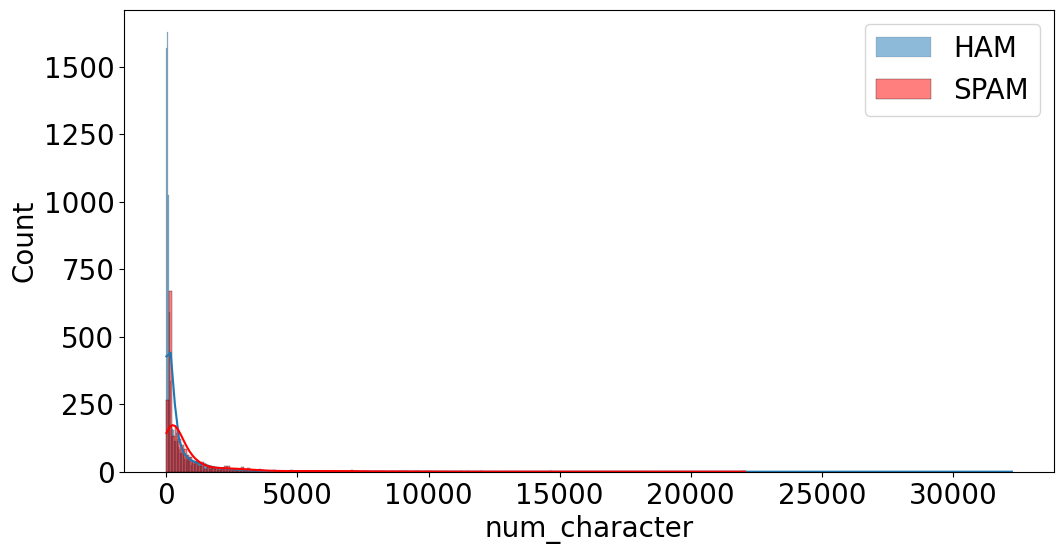

In [90]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_character'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_character'],color='red',label='SPAM',kde=True)
plt.legend()


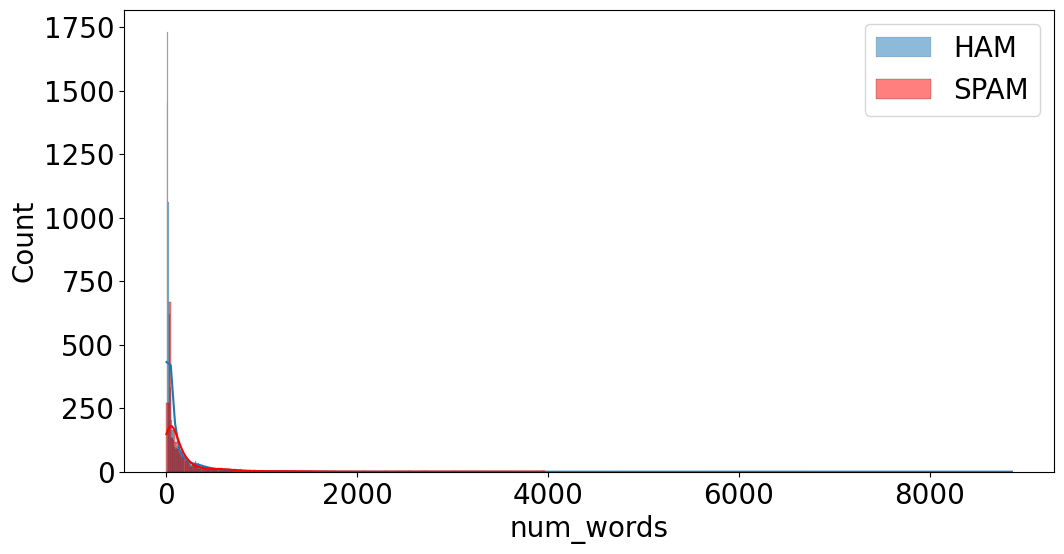

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_words'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_words'],color='red',label='SPAM',kde=True)
plt.legend()

<Figure size 1500x1000 with 0 Axes>

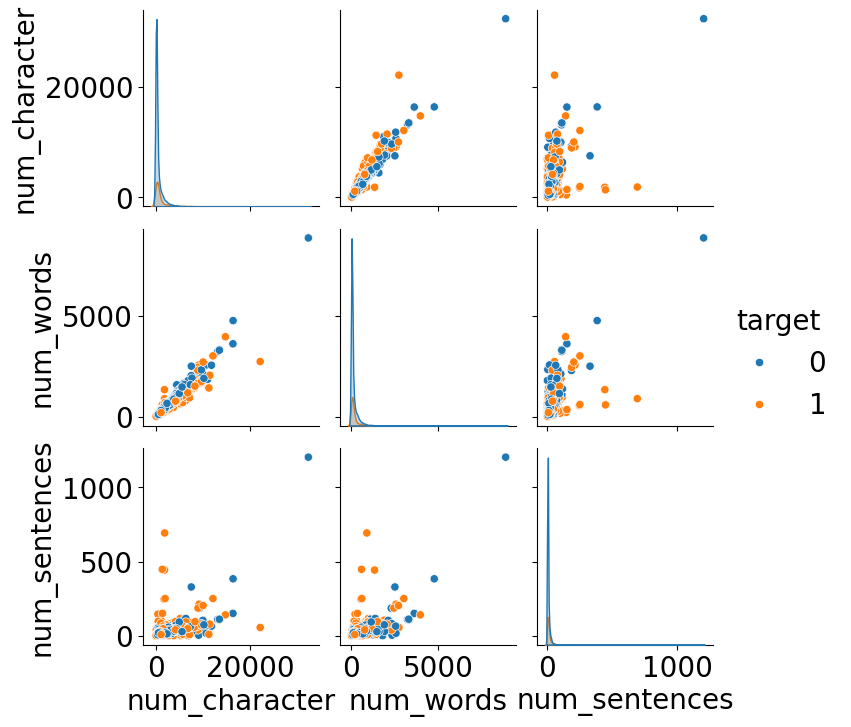

In [92]:
plt.figure(figsize=(15,10))
sns.pairplot(df1, hue='target')

## 3. Data preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [93]:
#import string
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#from nltk.stem import WordNetLemmatizer

#def transform_text(text):
 #   text =  text.lower()
  #  text =  nltk.word_tokenize(text)
   # ps = WordNetLemmatizer()
    #y=[]
    #k=[]
    # remove special characters
    #for i in text:
     #   if i.isalnum():
    #        y.append(i)
    # remove stop words and punctuations
    #for j in y:
     #   if j not in stopwords.words('english') and j not in string.punctuation:
      #      k.append(j)
    #text = y[:]
    #y.clear()
    #for i in text:
    #    y.append(ps.stem(i))
    

    #eturn " ".join(y)

In [94]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def transform_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    
    # Remove special characters
    filtered_tokens = [token for token in tokens if token.isalnum()]
    
    # Remove stop words and punctuation
    cleaned_tokens = [token for token in filtered_tokens if token not in stopwords.words('english') and token not in string.punctuation]
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
    
    return " ".join(lemmatized_tokens)

input_text = "Your input text goes here."
transformed_text = transform_text(input_text)
#print(transformed_text)


In [95]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [96]:
df1.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [97]:
df1['transformed_text'] =  df1['text'].apply(transform_text)

In [98]:
df1.transformed_text.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4                  nah think go usf life around though
Name: transformed_text, dtype: object

In [99]:
from wordcloud import WordCloud

In [100]:
#wc = WordCloud(width=1000, height=1000, min_font_size=14, background_color='white')

In [101]:
#spam_wc= wc.generate(df1[df1['target']==1]['transformed_text'].str.cat(sep=' '))

In [102]:
# plotting word cloud for spam messages
#plt.figure(figsize=(15,10))
#plt.title('SPAM Word Cloud')
#plt.imshow(spam_wc)

In [103]:
#ham_wc= wc.generate(df1[df1['target']==0]['transformed_text'].str.cat(sep=' '))
#plt.figure(figsize=(15,10))
#plt.title('HAM Word Cloud')
#plt.imshow(ham_wc)


In [104]:
ham_corp = []
for msg in df1[df1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corp.append(word)

In [105]:
spam_corp=[]
for msg in df1[df1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corp.append(word)

In [106]:
spam_corp

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd'

In [107]:
df1.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [108]:
df1.tail()

,target,text,num_character,num_words,num_sentences,transformed_text
10729,0,put the 10 on the ft\r\nthe transport volumes...,526,154,7,put 10 ft transport volume decreased 25000 100...
10730,0,3 / 4 / 2000 and following noms\r\nhpl can ' ...,1106,304,13,3 4 2000 following noms hpl take extra 15 mmcf...
10731,0,calpine daily gas nomination\r\n>\r\n>\r\njul...,394,77,7,calpine daily gas nomination julie mention ear...
10732,0,industrial worksheets for august 2000 activit...,565,110,20,industrial worksheet august 2000 activity atta...
10733,1,important online banking alert\r\ndear valued...,1106,198,8,important online banking alert dear valued cit...


## 4. Model Building

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(df1['transformed_text']).toarray()



In [110]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [111]:
X.shape

(10165, 51135)

In [112]:
Y =df1.target.values

In [113]:
Y

array([0, 0, 1, ..., 0, 0, 1])

##### Train test split

In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

#### Random forest classifier with count vectorizer

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
RFC = RandomForestClassifier()

In [ ]:
# randomforest classifier with count vectorizor
RFC.fit(x_train, y_train)
y_pred1 =  RFC.predict(x_test)
print ('Accuracy Score RFC')
print(accuracy_score(y_test, y_pred1))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

##### TFIDF Vectorizer

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)


In [118]:
X = tfidf.fit_transform(df1['transformed_text']).toarray()
Y =df1.target.values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [120]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize individual models
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier() 

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model_lr), 
    ('rf', model_rf), 
    ('svc', model_gb)
], voting='soft')  # Use 'hard' for majority voting or 'soft' for weighted average of predicted probabilities

# Fit the VotingClassifier
voting_clf.fit(x_train, y_train)

# Predict and evaluate
pred_voting = voting_clf.predict(x_test)
accuracy_voting = accuracy_score(y_test, pred_voting)

print(f"Voting Classifier Accuracy: {accuracy_voting}")

Voting Classifier Accuracy: 0.9370388588293163


####  with TFIDF randomforest ONLY

In [119]:

RFC.fit(x_train, y_train)
y_pred1 =  RFC.predict(x_test)
print ('Accuracy Score RFC')
print(accuracy_score(y_test, y_pred1))
print ('#############################')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('#############################')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score RFC
0.9488440727988194
#############################
CM
[[1585   20]
 [  84  344]]
#############################
Precision Score
0.945054945054945


## Model export

In [121]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting_clf,open('model.pkl','wb'))